In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib as mpl
import os
import numpy as np
import scipy
from scipy import stats

dpi = 300
mpl.rcParams['figure.dpi']= dpi
%config InlineBackend.figure_format = 'retina'

# import seaborn as sns
# sns.set()

import matplotlib.pyplot as plt
import matplotlib.font_manager
# import seaborn as sns
# sns.set()
from IPython.display import set_matplotlib_formats

set_matplotlib_formats("pdf", "png")
# plt.tight_layout()
plt.rcParams["figure.figsize"] = (6, 4)
plt.rcParams["axes.titlesize"] = 28
plt.rcParams["font.size"] = 28
plt.rcParams["lines.linewidth"] = 1.5
plt.rcParams["lines.markersize"] = 7
plt.rcParams["grid.linestyle"] = "--"
plt.rcParams["grid.linewidth"] = 1.0
plt.rcParams["legend.fontsize"] = 16
plt.rcParams["legend.facecolor"] = "white"
plt.rcParams["axes.labelsize"] = 22
plt.rcParams["xtick.labelsize"] = 18
plt.rcParams["ytick.labelsize"] = 18
plt.rcParams["xtick.direction"] = "in"
plt.rcParams["ytick.direction"] = "in"
plt.rcParams['xtick.major.pad'] = 8
plt.rcParams['ytick.major.pad'] = 8
plt.rcParams['axes.grid'] = True
plt.rcParams['font.family'] = 'DeJavu Serif'
plt.rcParams['font.serif'] = ['Times New Roman']
# plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams['text.usetex'] = False
plt.rcParams['text.latex.preamble'] = [r'\usepackage{amsmath, amssymb}']

%env XLA_PYTHON_CLIENT_ALLOCATOR=platform
eps = 1e-6

env: XLA_PYTHON_CLIENT_ALLOCATOR=platform


<ipython-input-1-e822ba533170>:46: MatplotlibDeprecationWarning: Support for setting the 'text.latex.preamble' or 'pgf.preamble' rcParam to a list of strings is deprecated since 3.3 and will be removed two minor releases later; set it to a single string instead.
  plt.rcParams['text.latex.preamble'] = [r'\usepackage{amsmath, amssymb}']


In [2]:
dataset = 'cifar10'
method_list = ['f_norm', 'jac_norm', 'map', 'ntk_norm', 'dropout']
train_size = '10000'
seed = 1

cmap = plt.get_cmap("tab20c")
blue = plt.get_cmap("Set1")(1)
red = plt.get_cmap("Set1")(0)
cmap_2 = plt.get_cmap("tab10")
cmap_3 = plt.get_cmap("Paired")
cmap_4 = plt.get_cmap("tab20b")

color_dict = {'ntk_norm': red,
             'f_norm': 'orange',
             'jac_norm': blue,
             'map': 'darkgreen',
             'map_no_wd': 'grey',
             'kernel': 'purple',
             'dropout': 'brown'}

linestyle_dict = {'True': ':',
                 'False': '-'}


directory = './results/cifar10'

acc_mean_aug_True = pd.read_csv(f'./notebooks_plotting/cifar_aug_True.csv')
acc_mean_aug_False = pd.read_csv(f'./notebooks_plotting/cifar_aug_False.csv')

acc_mean = {}
acc_mean = {'True': acc_mean_aug_True,
           'False': acc_mean_aug_False}

<ipython-input-3-cd41d9edd103>:115: RuntimeWarning: Mean of empty slice.
  test_acc_dict['True'][method]['mean'][i] = np.array(test_acc_DA_list_temp).mean()
/home/xzhoubi/hudson/miniconda3/envs/hudson/lib/python3.8/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/xzhoubi/hudson/miniconda3/envs/hudson/lib/python3.8/site-packages/numpy/core/_methods.py:261: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/xzhoubi/hudson/miniconda3/envs/hudson/lib/python3.8/site-packages/numpy/core/_methods.py:221: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/home/xzhoubi/hudson/miniconda3/envs/hudson/lib/python3.8/site-packages/numpy/core/_methods.py:253: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
<ipython-i

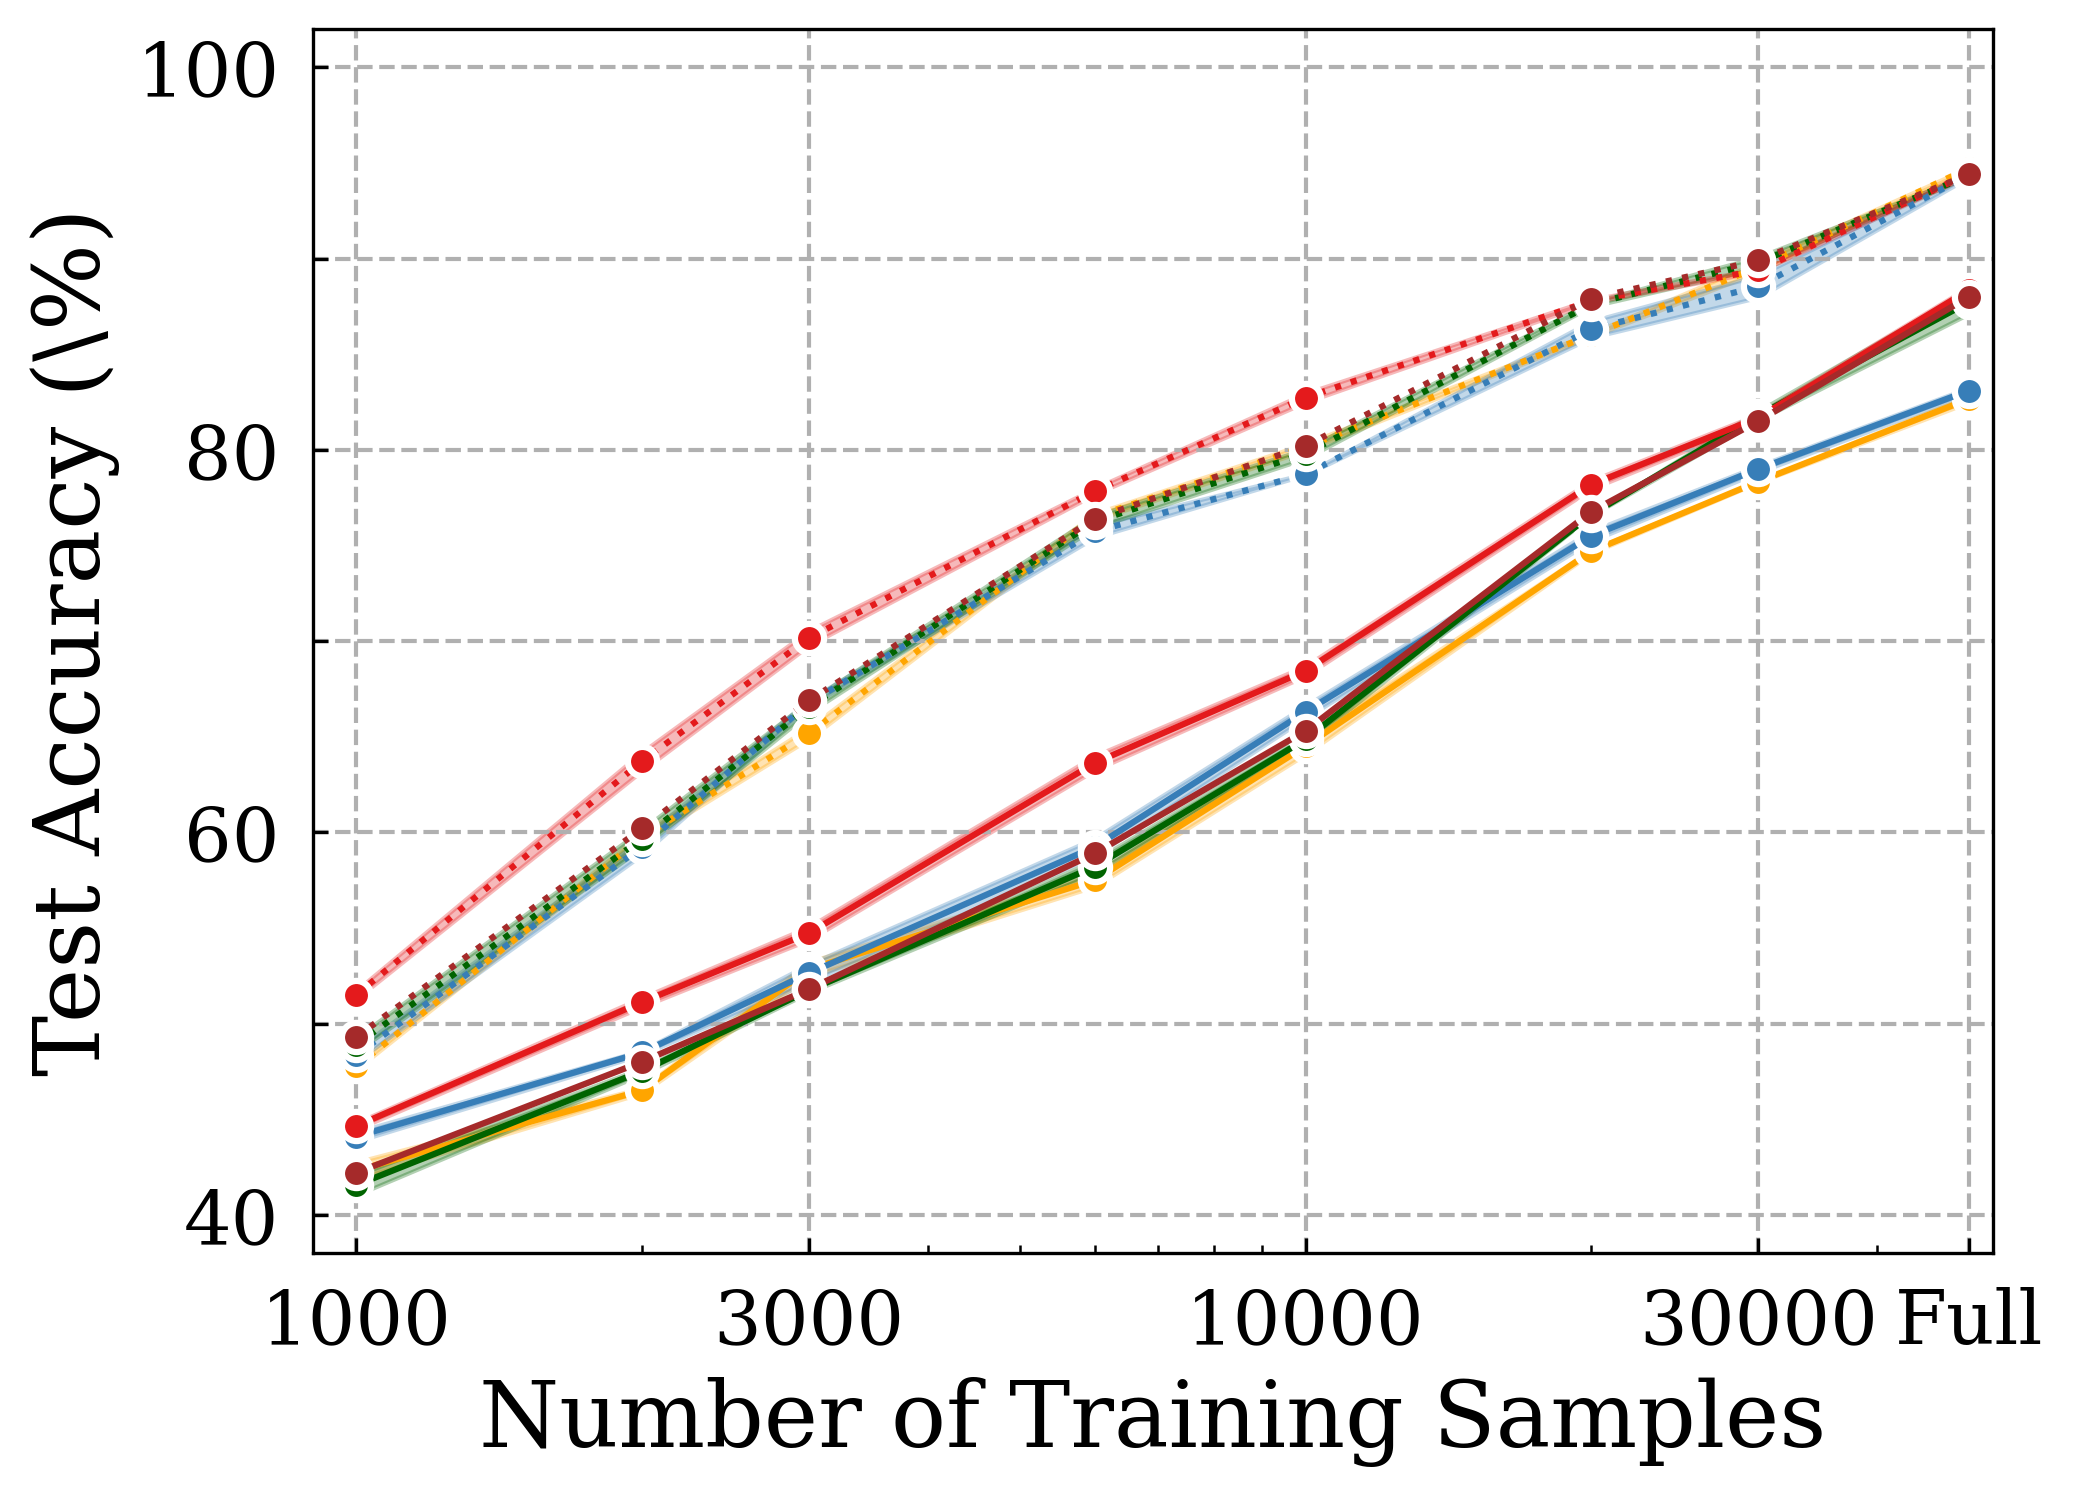

In [3]:
fig = plt.figure(figsize=(8, 6))
ax_test_acc = fig.subplots(1, 1)

ax_list = [ax_test_acc]

train_size_list = [1000, 2000, 3000, 6000, 10000, 20000, 30000, 50000]
test_acc_dict = {'True':
                 {'ntk_norm': {'mean': np.zeros(len(train_size_list)),
                             'ste': np.zeros(len(train_size_list))},
                'f_norm': {'mean': np.zeros(len(train_size_list)),
                             'ste': np.zeros(len(train_size_list))},
                'jac_norm': {'mean': np.zeros(len(train_size_list)),
                             'ste': np.zeros(len(train_size_list))},
                'map': {'mean': np.zeros(len(train_size_list)),
                             'ste': np.zeros(len(train_size_list))},
                'map_no_wd':{'mean': np.zeros(len(train_size_list)),
                             'ste': np.zeros(len(train_size_list))},
                'dropout': {'mean': np.zeros(len(train_size_list)),
                             'ste': np.zeros(len(train_size_list))}},
                'False':
                {'ntk_norm': {'mean': np.zeros(len(train_size_list)),
                             'ste': np.zeros(len(train_size_list))},
                'f_norm': {'mean': np.zeros(len(train_size_list)),
                             'ste': np.zeros(len(train_size_list))},
                'jac_norm': {'mean': np.zeros(len(train_size_list)),
                             'ste': np.zeros(len(train_size_list))},
                'map': {'mean': np.zeros(len(train_size_list)),
                             'ste': np.zeros(len(train_size_list))},
                'dropout': {'mean': np.zeros(len(train_size_list)),
                             'ste': np.zeros(len(train_size_list))},
                'map_no_wd':{'mean': np.zeros(len(train_size_list)),
                             'ste': np.zeros(len(train_size_list))}}}

test_ece_dict = {'True':
                 {'ntk_norm': {'mean': np.zeros(len(train_size_list)),
                             'ste': np.zeros(len(train_size_list))},
                'f_norm': {'mean': np.zeros(len(train_size_list)),
                             'ste': np.zeros(len(train_size_list))},
                'jac_norm': {'mean': np.zeros(len(train_size_list)),
                             'ste': np.zeros(len(train_size_list))},
                'map': {'mean': np.zeros(len(train_size_list)),
                             'ste': np.zeros(len(train_size_list))},
                'map_no_wd':{'mean': np.zeros(len(train_size_list)),
                             'ste': np.zeros(len(train_size_list))}},
                'False':
                {'ntk_norm': {'mean': np.zeros(len(train_size_list)),
                             'ste': np.zeros(len(train_size_list))},
                'f_norm': {'mean': np.zeros(len(train_size_list)),
                             'ste': np.zeros(len(train_size_list))},
                'jac_norm': {'mean': np.zeros(len(train_size_list)),
                             'ste': np.zeros(len(train_size_list))},
                'map': {'mean': np.zeros(len(train_size_list)),
                             'ste': np.zeros(len(train_size_list))},
                'map_no_wd':{'mean': np.zeros(len(train_size_list)),
                             'ste': np.zeros(len(train_size_list))}}}

test_llk_dict = {'True':
                 {'ntk_norm': {'mean': np.zeros(len(train_size_list)),
                             'ste': np.zeros(len(train_size_list))},
                'f_norm': {'mean': np.zeros(len(train_size_list)),
                             'ste': np.zeros(len(train_size_list))},
                'jac_norm': {'mean': np.zeros(len(train_size_list)),
                             'ste': np.zeros(len(train_size_list))},
                'map': {'mean': np.zeros(len(train_size_list)),
                             'ste': np.zeros(len(train_size_list))},
                'map_no_wd':{'mean': np.zeros(len(train_size_list)),
                             'ste': np.zeros(len(train_size_list))}},
                'False':
                {'ntk_norm': {'mean': np.zeros(len(train_size_list)),
                             'ste': np.zeros(len(train_size_list))},
                'f_norm': {'mean': np.zeros(len(train_size_list)),
                             'ste': np.zeros(len(train_size_list))},
                'jac_norm': {'mean': np.zeros(len(train_size_list)),
                             'ste': np.zeros(len(train_size_list))},
                'map': {'mean': np.zeros(len(train_size_list)),
                             'ste': np.zeros(len(train_size_list))},
                'map_no_wd':{'mean': np.zeros(len(train_size_list)),
                             'ste': np.zeros(len(train_size_list))}}}



for i in range(len(train_size_list)):
    train_size = train_size_list[i]
    for method in method_list:
        test_acc_DA_list_temp = []
        test_ece_DA_list_temp = []
        test_llk_DA_list_temp = []
        test_acc_no_DA_list_temp = []
        test_ece_no_DA_list_temp = []
        test_llk_no_DA_list_temp = []
        
        for filename in os.listdir(directory):
            if (("dataset_" + dataset) in filename and ("method_" + method + '__') in filename 
            and ("train_size_" + str(train_size) + '_') in filename 
            and "complete" in filename):
                data = pd.read_csv(f'{directory}/{filename}/metrics.csv')
                DA = filename.split("DA_")[1].split("__")[0]
                
                test_llk = np.array(data['Test LLK'].values).max()
                test_acc = np.array(data['Test Acc'].values).max()
                test_ece = np.array(data['Test ECE'].values).max()
                
                if DA == 'True':
                    test_acc_DA_list_temp.append(test_acc)
                    test_ece_DA_list_temp.append(test_ece)
                    test_llk_DA_list_temp.append(test_llk)
                elif DA == 'False':
                    test_acc_no_DA_list_temp.append(test_acc)
                    test_ece_no_DA_list_temp.append(test_ece)
                    test_llk_no_DA_list_temp.append(test_llk)
                else:
                    pass
        

        test_acc_dict['True'][method]['mean'][i] = np.array(test_acc_DA_list_temp).mean()
        test_acc_dict['True'][method]['ste'][i] = stats.sem(np.array(test_acc_DA_list_temp))
#         test_ece_dict['True'][method]['mean'][i] = np.array(test_ece_DA_list_temp).mean()
#         test_ece_dict['True'][method]['ste'][i] = stats.sem(np.array(test_ece_DA_list_temp))
#         test_llk_dict['True'][method]['mean'][i] = np.array(test_llk_DA_list_temp).mean()
#         test_llk_dict['True'][method]['ste'][i] = stats.sem(np.array(test_llk_DA_list_temp))

        test_acc_dict['False'][method]['mean'][i] = np.array(test_acc_no_DA_list_temp).mean()
        test_acc_dict['False'][method]['ste'][i] = stats.sem(np.array(test_acc_no_DA_list_temp))
#         test_ece_dict['False'][method]['mean'][i] = np.array(test_ece_no_DA_list_temp).mean()
#         test_ece_dict['False'][method]['ste'][i] = stats.sem(np.array(test_ece_no_DA_list_temp))
#         test_llk_dict['False'][method]['mean'][i] = np.array(test_llk_no_DA_list_temp).mean()
#         test_llk_dict['False'][method]['ste'][i] = stats.sem(np.array(test_llk_no_DA_list_temp))


for method in method_list:
    for DA in ['True', 'False']:
        ax_test_acc.plot(np.array(train_size_list), np.array(acc_mean[DA][method].values)
                         , marker='o', color = color_dict[method],
                         ms=7, markerfacecolor=color_dict[method], markeredgecolor='white', markeredgewidth=1.5, 
                         linestyle=linestyle_dict[DA], label=method)
        ax_test_acc.fill_between(np.array(train_size_list), 
                                 np.array(acc_mean[DA][method].values) - test_acc_dict[DA][method]['ste'],
                                 np.array(acc_mean[DA][method].values) + test_acc_dict[DA][method]['ste'],
                         color = color_dict[method], alpha=0.3)

#         ax_test_ece.plot(np.array(train_size_list), test_ece_dict[DA][method]['mean'], 
#                          color = color_dict[method], linestyle=linestyle_dict[DA], label=method)
#         ax_test_ece.fill_between(np.array(train_size_list), test_ece_dict[DA][method]['mean'] - test_ece_dict[DA][method]['ste'],
#                                  test_ece_dict[DA][method]['mean'] + test_ece_dict[DA][method]['ste'],
#                          color = color_dict[method], alpha=0.3)

#         ax_test_llk.plot(np.array(train_size_list), test_llk_dict[DA][method]['mean'], 
#                          color = color_dict[method], linestyle=linestyle_dict[DA], label=method)
#         ax_test_llk.fill_between(np.array(train_size_list), test_llk_dict[DA][method]['mean'] - test_llk_dict[DA][method]['ste'],
#                                  test_llk_dict[DA][method]['mean'] + test_llk_dict[DA][method]['ste'],
#                          color = color_dict[method], alpha=0.3)
                

for ax in ax_list:
#     ax.legend()
    ax.set_xscale("log")
    ax.set_xlabel(r"Number of Training Samples")
    ax.set_ylabel(r"Test Accuracy (\%)")
    ax.set_xlim([900, 53000])
    ax.set_ylim([38, 102])
    ax.set_yticks([40, 50, 60, 70, 80, 90, 100])
    ax.set_yticklabels([40, None, 60, None, 80, None, 100])
    ax.set_xticks([1000, 3000, 1e4, 3e4, 5e4])
    ax.set_xticklabels(['1000', '3000', '10000', '30000', 'Full'])

fig.subplots_adjust(bottom=0.2)
fig.subplots_adjust(left=0.2)
fig.savefig('./aistats_plot/cifar10.pdf')



In [ ]:
test_acc_dict

